In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [3]:
#Reading the dataset
car_sales_encoded = pd.read_csv('Resources/car_sales_mpg_encoded.csv')
car_sales_encoded.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,0,3,5,2,0,6,15.0,17.0,1,3,1,555.0,103217,106583,20848
1,0,3,2,8,1,5,18.0,23.0,2,4,1,444.0,178914,185615,228947
2,0,3,2,8,0,7,19.0,24.0,2,5,1,430.0,178914,185615,228947
3,0,3,2,8,0,5,19.0,24.0,2,5,1,430.0,178914,185615,228947
4,0,3,2,6,1,7,17.0,21.0,2,4,1,471.0,178914,185615,228947


In [4]:
car_sales_encoded['cmb_mpg'].value_counts()

1    200
2    176
0     95
Name: cmb_mpg, dtype: int64

In [5]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('cmb_mpg', axis=1)
y = car_sales_ml['cmb_mpg']

In [6]:
# Encode the dependent variable
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [7]:
#Define the encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels] = 1
    return one_hot_encode

In [8]:
y = encoder.transform(y)
Y = one_hot_encode(y)


In [9]:
# Convert the dataset into train and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=415, test_size=0.10)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(423, 14)
(423, 3)
(48, 14)


In [11]:
# Apply Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train[:10]

array([[-0.57098057,  0.43845944, -0.32841105, -0.31343845, -0.86483171,
        -0.34554798, -0.20374069, -0.19029714, -0.16515941, -0.00821884,
         0.1228408 ,  2.05203252,  2.05815067,  0.46415097],
       [-0.57098057,  0.43845944, -0.32841105,  1.63061527, -0.86483171,
        -0.34554798, -0.15560759, -0.19029714, -0.16515941, -0.00821884,
        -0.01944682,  0.03979316,  0.06615256,  2.28856085],
       [-0.57098057,  0.43845944,  1.77640523, -0.70224919,  1.15629433,
        -1.63905943, -0.34813998, -0.50921825, -0.76742172, -0.00821884,
         0.79870699,  0.1992949 ,  0.16772537, -0.4144001 ],
       [-0.57098057,  0.43845944, -0.32841105,  0.85299378, -0.86483171,
        -0.34554798, -0.10747449, -0.06272869, -0.16515941, -0.00821884,
        -0.26845015, -0.38556543, -0.36552641, -0.54221407],
       [-0.57098057, -0.73539083, -0.32841105, -0.70224919, -0.86483171,
         0.30120775, -0.34813998, -0.44543403, -0.16515941, -0.00821884,
         0.17619866,  2.05

In [13]:
# Define the important parameters and variable 
#to work with the tensors

learning_rate = 0.3
training_epochs = 600
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
print('n_dim',n_dim)

n_dim 14


In [14]:
n_class = 3
model_path = "Model/tensorflow/NMI"

#Define the number of hidden layers and number of neurons for each layer 
n_hidden_1 = 14
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 8

x = tf.placeholder(tf.float32,[None,n_dim])
w = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None, n_class])

In [15]:
#Define the model
def multilayer_perceptron(x,weights,biases):
    #Hidden layer with RELU activationsed
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)   
    
    #Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #Output layer with linear activation
    output_layer = tf.matmul(layer_4,weights['out']+biases['out'])
    
    return output_layer
    

In [16]:
#Define the weights and the biases for each layer
weights = {
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases = {
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [17]:
#Initialized all the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [18]:
#Call your model defined
y = multilayer_perceptron(x,weights,biases)

In [19]:
# Define the cost function and optimizer
cost_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

W0309 21:02:56.350052 140735700255616 deprecation.py:323] From <ipython-input-19-6fcdfce56050>:4: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
sess = tf.Session()
sess.run(init)

In [21]:
# Calculate the cost and accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: X_train, y_: y_train})
    cost = sess.run(cost_function,
                    feed_dict={x: X_train, y_: y_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1),
                                  tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                      tf.float32))
    pred_y = sess.run(y, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(pred_y-y_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_: y_train}))
    accuracy_history.append(accuracy)

    print('epoch: ', epoch, ' - ', 'cost: ', cost, ' - MSE: ', mse_,
          ' - Train Accuracy: ', accuracy)

epoch:  0  -  cost:  4.092662  - MSE:  58.63594815870013  - Train Accuracy:  0.37588653
epoch:  1  -  cost:  4.198974  - MSE:  23.464732742554894  - Train Accuracy:  0.41607565
epoch:  2  -  cost:  1.0178304  - MSE:  1.4324301584392611  - Train Accuracy:  0.42316785
epoch:  3  -  cost:  1.0076208  - MSE:  1.4807799252920324  - Train Accuracy:  0.4539007
epoch:  4  -  cost:  0.9988777  - MSE:  1.5610773419351478  - Train Accuracy:  0.45153666
epoch:  5  -  cost:  0.9928319  - MSE:  1.6396670082173488  - Train Accuracy:  0.45862883
epoch:  6  -  cost:  0.9873017  - MSE:  1.700506394585062  - Train Accuracy:  0.45862883
epoch:  7  -  cost:  0.98033077  - MSE:  1.7540480101542353  - Train Accuracy:  0.47044918
epoch:  8  -  cost:  0.97191226  - MSE:  1.8316155259249172  - Train Accuracy:  0.4822695
epoch:  9  -  cost:  0.9649043  - MSE:  1.9039069497420797  - Train Accuracy:  0.47754136
epoch:  10  -  cost:  0.9583653  - MSE:  1.9332996671936418  - Train Accuracy:  0.48699763
epoch:  11  -

epoch:  94  -  cost:  0.48957723  - MSE:  10.18868624911609  - Train Accuracy:  0.8014184
epoch:  95  -  cost:  0.48429045  - MSE:  11.028657848643208  - Train Accuracy:  0.7990544
epoch:  96  -  cost:  0.4795971  - MSE:  10.634902284028096  - Train Accuracy:  0.81560284
epoch:  97  -  cost:  0.4774018  - MSE:  11.566857896844812  - Train Accuracy:  0.7990544
epoch:  98  -  cost:  0.47606117  - MSE:  10.864582918558146  - Train Accuracy:  0.81560284
epoch:  99  -  cost:  0.47603577  - MSE:  12.157891721732868  - Train Accuracy:  0.78486997
epoch:  100  -  cost:  0.47755963  - MSE:  11.053445034616097  - Train Accuracy:  0.8014184
epoch:  101  -  cost:  0.48834586  - MSE:  12.877997752484118  - Train Accuracy:  0.75177306
epoch:  102  -  cost:  0.50161535  - MSE:  10.901528378830017  - Train Accuracy:  0.75886524
epoch:  103  -  cost:  0.5459539  - MSE:  13.867666023892578  - Train Accuracy:  0.7234042
epoch:  104  -  cost:  0.5403615  - MSE:  10.336855640042387  - Train Accuracy:  0.68

epoch:  184  -  cost:  0.29438362  - MSE:  19.33232469342569  - Train Accuracy:  0.9030733
epoch:  185  -  cost:  0.29664502  - MSE:  22.691805187918288  - Train Accuracy:  0.8794326
epoch:  186  -  cost:  0.2900617  - MSE:  19.673546581874486  - Train Accuracy:  0.9030733
epoch:  187  -  cost:  0.29162613  - MSE:  22.984606289165033  - Train Accuracy:  0.8794326
epoch:  188  -  cost:  0.28551233  - MSE:  20.030778737713817  - Train Accuracy:  0.9030733
epoch:  189  -  cost:  0.28716555  - MSE:  23.292926990184398  - Train Accuracy:  0.8794326
epoch:  190  -  cost:  0.28146031  - MSE:  20.384706452006597  - Train Accuracy:  0.8983452
epoch:  191  -  cost:  0.283045  - MSE:  23.620609699134732  - Train Accuracy:  0.88416076
epoch:  192  -  cost:  0.27761135  - MSE:  20.745792916982012  - Train Accuracy:  0.8983452
epoch:  193  -  cost:  0.2794605  - MSE:  23.962073585016455  - Train Accuracy:  0.88416076
epoch:  194  -  cost:  0.27424926  - MSE:  21.09511699471848  - Train Accuracy:  0.

epoch:  274  -  cost:  0.15129313  - MSE:  34.61265707684393  - Train Accuracy:  0.9527187
epoch:  275  -  cost:  0.1552231  - MSE:  36.91639869564415  - Train Accuracy:  0.9361702
epoch:  276  -  cost:  0.14971375  - MSE:  34.93875119483786  - Train Accuracy:  0.9550827
epoch:  277  -  cost:  0.15422878  - MSE:  37.30278932763782  - Train Accuracy:  0.9361702
epoch:  278  -  cost:  0.14853954  - MSE:  35.24962255187807  - Train Accuracy:  0.95981085
epoch:  279  -  cost:  0.15356568  - MSE:  37.69006555510744  - Train Accuracy:  0.9361702
epoch:  280  -  cost:  0.14755881  - MSE:  35.55487602619536  - Train Accuracy:  0.9574468
epoch:  281  -  cost:  0.15305448  - MSE:  38.07670274108307  - Train Accuracy:  0.9361702
epoch:  282  -  cost:  0.14699294  - MSE:  35.85235405139242  - Train Accuracy:  0.9574468
epoch:  283  -  cost:  0.15318744  - MSE:  38.47033075221347  - Train Accuracy:  0.9361702
epoch:  284  -  cost:  0.14669916  - MSE:  36.13714962432713  - Train Accuracy:  0.9574468

epoch:  364  -  cost:  0.06718402  - MSE:  53.52726891714344  - Train Accuracy:  0.99763596
epoch:  365  -  cost:  0.06926705  - MSE:  55.2529906047902  - Train Accuracy:  0.97635937
epoch:  366  -  cost:  0.06780985  - MSE:  53.9034848279251  - Train Accuracy:  0.99763596
epoch:  367  -  cost:  0.07040863  - MSE:  55.81857471016389  - Train Accuracy:  0.97635937
epoch:  368  -  cost:  0.06847839  - MSE:  54.25474546186076  - Train Accuracy:  0.9929078
epoch:  369  -  cost:  0.07167455  - MSE:  56.35536728583343  - Train Accuracy:  0.97635937
epoch:  370  -  cost:  0.06931509  - MSE:  54.58154522953271  - Train Accuracy:  0.9929078
epoch:  371  -  cost:  0.07306755  - MSE:  56.867289508990474  - Train Accuracy:  0.97399527
epoch:  372  -  cost:  0.07025647  - MSE:  54.8975934124518  - Train Accuracy:  0.9881797
epoch:  373  -  cost:  0.074528545  - MSE:  57.3642355938546  - Train Accuracy:  0.9716312
epoch:  374  -  cost:  0.06927264  - MSE:  55.225833472012745  - Train Accuracy:  0.99

epoch:  455  -  cost:  0.033396985  - MSE:  74.67664653114687  - Train Accuracy:  1.0
epoch:  456  -  cost:  0.03319346  - MSE:  74.7493395337496  - Train Accuracy:  1.0
epoch:  457  -  cost:  0.032997195  - MSE:  75.07565883758929  - Train Accuracy:  1.0
epoch:  458  -  cost:  0.032801267  - MSE:  75.18880669541814  - Train Accuracy:  1.0
epoch:  459  -  cost:  0.032632884  - MSE:  75.50312777648791  - Train Accuracy:  1.0
epoch:  460  -  cost:  0.032434147  - MSE:  75.58717251758694  - Train Accuracy:  1.0
epoch:  461  -  cost:  0.032250922  - MSE:  75.90080376826045  - Train Accuracy:  1.0
epoch:  462  -  cost:  0.03205783  - MSE:  76.01947234913655  - Train Accuracy:  1.0
epoch:  463  -  cost:  0.031899124  - MSE:  76.32337617251916  - Train Accuracy:  1.0
epoch:  464  -  cost:  0.03170304  - MSE:  76.41222973706685  - Train Accuracy:  1.0
epoch:  465  -  cost:  0.03153109  - MSE:  76.71677921931392  - Train Accuracy:  1.0
epoch:  466  -  cost:  0.031339854  - MSE:  76.839202663953

epoch:  551  -  cost:  0.020452736  - MSE:  93.0913863920042  - Train Accuracy:  1.0
epoch:  552  -  cost:  0.020363227  - MSE:  93.26703928889009  - Train Accuracy:  1.0
epoch:  553  -  cost:  0.02027772  - MSE:  93.45751971424596  - Train Accuracy:  1.0
epoch:  554  -  cost:  0.02018024  - MSE:  93.59802301110608  - Train Accuracy:  1.0
epoch:  555  -  cost:  0.020089045  - MSE:  93.79009795787806  - Train Accuracy:  1.0
epoch:  556  -  cost:  0.020001847  - MSE:  93.96464851511462  - Train Accuracy:  1.0
epoch:  557  -  cost:  0.019918645  - MSE:  94.15344286336955  - Train Accuracy:  1.0
epoch:  558  -  cost:  0.019823816  - MSE:  94.29327911339449  - Train Accuracy:  1.0
epoch:  559  -  cost:  0.019735059  - MSE:  94.4832820553837  - Train Accuracy:  1.0
epoch:  560  -  cost:  0.01965001  - MSE:  94.65682395802644  - Train Accuracy:  1.0
epoch:  561  -  cost:  0.019569118  - MSE:  94.84389255919649  - Train Accuracy:  1.0
epoch:  562  -  cost:  0.019476816  - MSE:  94.983012651472

In [22]:
# Save the model for future use
save_path = saver.save(sess, model_path)
print('Model saved in file: %s' % save_path)

Model saved in file: Model/tensorflow/NMI


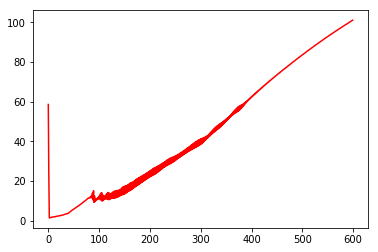

In [23]:
# plot mse
plt.plot(mse_history, 'r')
plt.show()

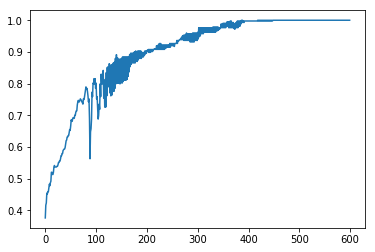

In [24]:
# Plot accuracy graph
plt.plot(accuracy_history)
plt.show()

In [25]:
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(
    tf.cast(correct_prediction, tf.float32))
print('Test Accuracy: ',
      (sess.run(accuracy, feed_dict ={x: X_test, y_: y_test})))
print(correct_prediction)
print(accuracy)


Test Accuracy:  1.0
Tensor("Equal_600:0", shape=(?,), dtype=bool)
Tensor("Mean_1201:0", shape=(), dtype=float32)


In [26]:
#Print the final mean square error
pred_y = sess.run(y,feed_dict={x:X_test} )
mse = tf.reduce_mean(tf.square(pred_y-y_test))
print("MSE: %.4f" % sess.run(mse))

MSE: 101.1188
